In [1]:
from __future__ import print_function
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2
from google.colab.patches import cv2_imshow
from tkinter import *
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2

In [2]:
def midpoint(ptA, ptB):
    return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

In [6]:
image = cv2.imread('/content/drive/MyDrive/Capstone Codes/images (26).jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
edged = cv2.Canny(gray, 50, 100)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)

In [8]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
                        cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [9]:
(cnts, _) = contours.sort_contours(cnts)
colors = ((0, 0, 255), (240, 0, 159), (0, 165, 255), (255, 255, 0),(255, 0, 255))
refObj = None

In [10]:
for c in cnts:
    if cv2.contourArea(c) < 100:
        continue
    box = cv2.minAreaRect(c)
    box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
    box = np.array(box, dtype="int")
    box = perspective.order_points(box)
    cX = np.average(box[:, 0])
    cY = np.average(box[:, 1])
    if refObj is None:
        (tl, tr, br, bl) = box
        (tlblX, tlblY) = midpoint(tl, bl)
        (trbrX, trbrY) = midpoint(tr, br)
        D = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))
        refObj = (box, (cX, cY), D / 70)
        continue
    orig = image.copy()
    cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
    cv2.drawContours(orig, [refObj[0].astype("int")], -1, (0, 255, 0), 2)
    refCoords = np.vstack([refObj[0], refObj[1]])
    objCoords = np.vstack([box, (cX, cY)])

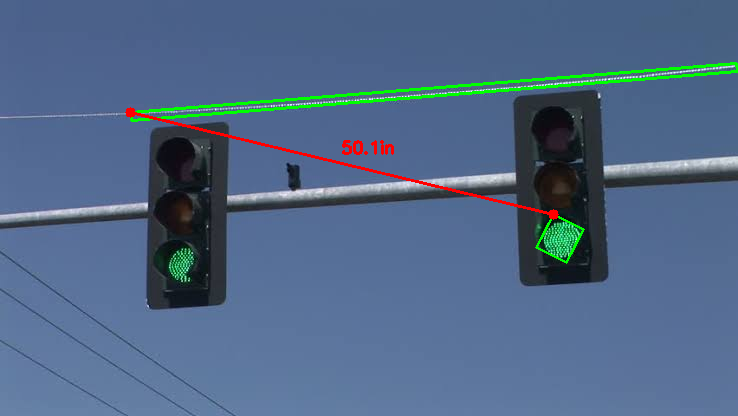

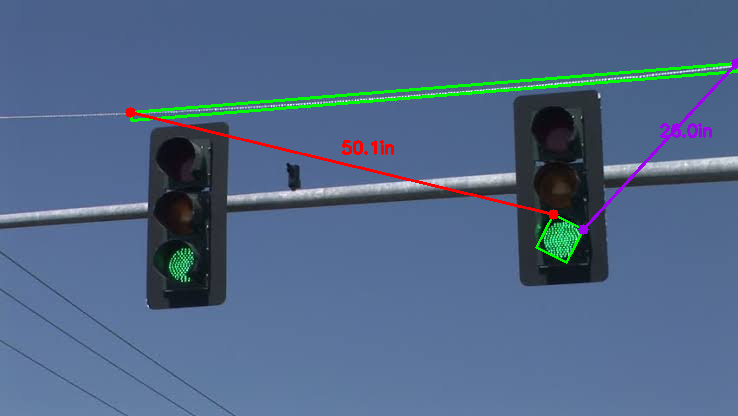

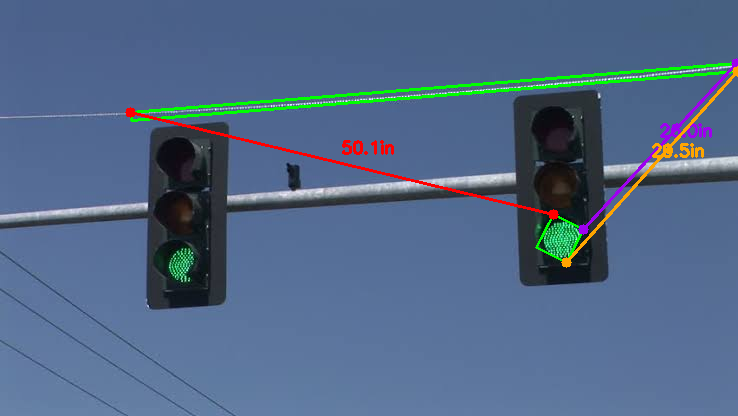

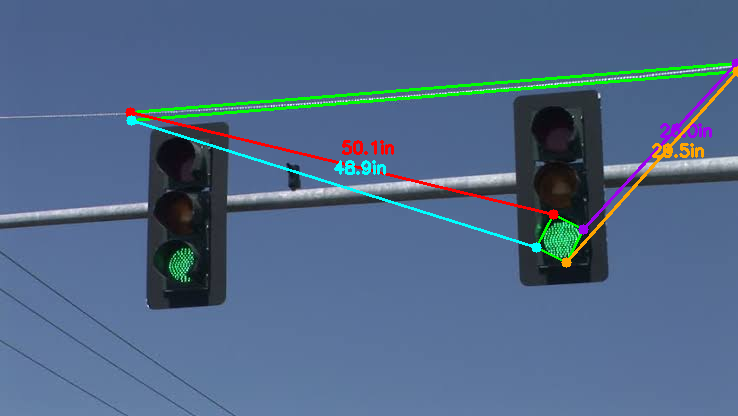

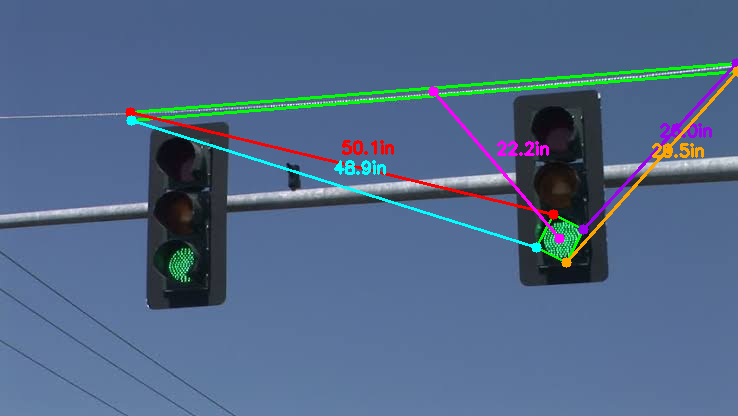

In [11]:
for ((xA, yA), (xB, yB), color) in zip(refCoords, objCoords, colors):
        cv2.circle(orig, (int(xA), int(yA)), 5, color, -1)
        cv2.circle(orig, (int(xB), int(yB)), 5, color, -1)
        cv2.line(orig, (int(xA), int(yA)), (int(xB), int(yB)),
                 color, 2)
        D = dist.euclidean((xA, yA), (xB, yB)) / refObj[2]
        (mX, mY) = midpoint((xA, yA), (xB, yB))
        cv2.putText(orig, "{:.1f}in".format(D), (int(mX), int(mY - 10)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.55, color, 2)
        
        cv2_imshow(orig)
        cv2.waitKey(0)
cv2.destroyAllWindows()